In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [45]:
class Linear_Regression:

  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, x, y):
      n_samples , n_features = x.shape
      self.weights = np.zeros(n_features)
      self.bias = 0

      for _ in range(self.n_iters):
        y_pred = np.dot(x, self.weights) + self.bias

        dw = (2/n_samples) * np.dot(x.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)

        self.weights = self.weights - self.lr * dw
        self.bias = self.bias - self.lr * db


  def predict(self, x):
    y_pred = np.dot(x, self.weights) + self.bias
    return y_pred


Mean Square Error = 305.7741316085243


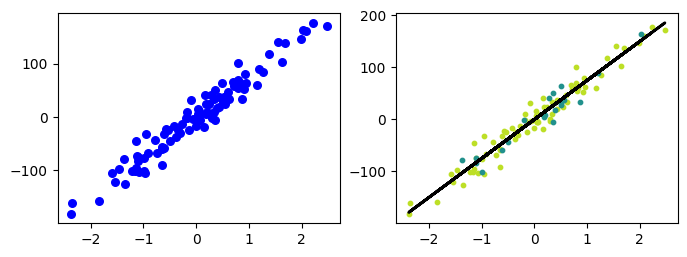

In [46]:
if __name__ == "__main__":
    x, y = datasets.make_regression(n_samples = 100,
                                    n_features = 1,
                                    noise = 20,
                                    random_state = 4)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

    fig = plt.figure(figsize = (8, 6))
    plt1 = fig.add_subplot(2, 2, 1)
    plt2 = fig.add_subplot(2, 2, 2)

    plt1.scatter(x[:, 0], y, color = "b", marker = "o", s = 30)

    reg = Linear_Regression(lr = 0.01)
    reg.fit(x_train, y_train)
    predictions = reg.predict(x_test)

    def mse(y_test, predictions):
      return np.mean((y_test - predictions) ** 2)

    mse = mse(y_test, predictions)
    print("Mean Square Error =", mse)

    y_pred_line = reg.predict(x)
    cmap = plt.get_cmap('viridis')
    m1 = plt.scatter(x_train, y_train, color = cmap(0.9), s = 10)
    m2 = plt.scatter(x_test, y_test, color = cmap(0.5), s = 10)

    plt2.plot(x, y_pred_line, color = 'black', linewidth = 2, label = 'Predictions')